In [1]:
import h5py

f = h5py.File('default_2048_sector10.hdf', 'r')

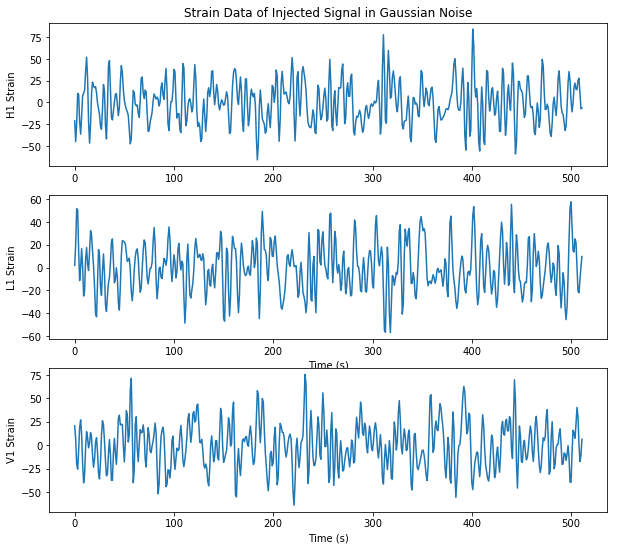

In [3]:
import matplotlib.pyplot as plt
import numpy as np

i=0

h1_strain = np.array(f['injection_samples']['h1_strain'][i])
l1_strain = np.array(f['injection_samples']['l1_strain'][i])
v1_strain = np.array(f['injection_samples']['v1_strain'][i])
#strain_time = np.arange(0.0,8.0,1/2048.0)

#mass1 = f['injection_parameters']['mass1'][i]
#mass2 = f['injection_parameters']['mass2'][i]
#spin1z = f['injection_parameters']['spin1z'][i]
#spin2z = f['injection_parameters']['spin2z'][i]
#coa_phase = f['injection_parameters']['coa_phase'][i]
#inclination = f['injection_parameters']['inclination'][i]

plt.figure(figsize=(10,9))
h1 = plt.subplot(311)
plt.title('Strain Data of Injected Signal in Gaussian Noise')
h1.plot(h1_strain)
h1.set_ylabel('H1 Strain')

l1 = plt.subplot(312)
l1.plot(l1_strain)
l1.set_ylabel('L1 Strain')
plt.xlabel('Time (s)')

l1 = plt.subplot(313)
l1.plot(v1_strain)
l1.set_ylabel('V1 Strain')
plt.xlabel('Time (s)')

plt.show()

In [7]:
print(len(f['injection_samples']['h1_strain'][0]))

512


In [13]:
print(np.array(f['injection_parameters'].keys()))
print(np.array(len(f['static_arguments'])))

[u'coa_phase' u'dec' u'h1_signal' u'h1_snr' u'inclination'
 u'injection_snr' u'l1_signal' u'l1_snr' u'mass1' u'mass2' u'polarization'
 u'ra' u'scale_factor' u'spin1z' u'spin2z' u'v1_signal' u'v1_snr']
0


In [9]:
import pycbc.noise
import pycbc.psd
from pycbc.filter import matched_filter
from pycbc.waveform import get_td_waveform
import pycbc

import matplotlib.pyplot as plt

deltat=1.0/2048

h1_hp = pycbc.types.timeseries.TimeSeries(h1_strain, delta_t=deltat, epoch=0, dtype=None, copy=True)
h1_stilde = h1_hp.to_frequencyseries()

l1_hp = pycbc.types.timeseries.TimeSeries(l1_strain, delta_t=deltat, epoch=0, dtype=None, copy=True)
l1_stilde = l1_hp.to_frequencyseries()

v1_hp = pycbc.types.timeseries.TimeSeries(v1_strain, delta_t=deltat, epoch=0, dtype=None, copy=True)
v1_stilde = v1_hp.to_frequencyseries()

flow= 30

#template_hp, template_hc = pycbc.waveform.get_fd_waveform(approximant="TaylorF2",
#                            mass1=11.87, mass2=14.75, spin1z=0.75, spin2z=0.6, coa_phase=0.98,
#                            inclination=0.49, delta_f=stilde.delta_f, f_lower=flow)

temp_time_hp, temp_time_hc = get_td_waveform(approximant='SEOBNRv4', mass1=mass1, mass2=mass2,
                                 spin1z=spin1z, spin2z=spin1z,
                                 delta_t=deltat, coa_phase=coa_phase, inclination=inclination,
                                 f_lower=flow)
template_hp = temp_time_hp.to_frequencyseries(delta_f=h1_stilde.delta_f)

template_hp.resize(len(h1_stilde))

h1_snr_series = matched_filter(template_hp, h1_stilde.astype(complex), psd=None,
                                      low_frequency_cutoff=flow)
l1_snr_series = matched_filter(template_hp, l1_stilde.astype(complex), psd=None,
                                      low_frequency_cutoff=flow)
v1_snr_series = matched_filter(template_hp, v1_stilde.astype(complex), psd=None,
                                      low_frequency_cutoff=flow)

plt.figure(figsize=(10,9))
plt.subplot(311)
plt.plot(h1_snr_series.sample_times, abs(h1_snr_series), 'r')
plt.grid(True)
plt.title('Matched Filter SNR of Gaussian Noise')
plt.ylabel('H1 SNR')

plt.subplot(312)
plt.plot(l1_snr_series.sample_times, abs(l1_snr_series), 'r')
plt.grid(True)
plt.ylabel('L1 SNR')

plt.subplot(313)
plt.plot(v1_snr_series.sample_times, abs(v1_snr_series), 'r')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('V1 SNR')

plt.show()

ValueError: The value of delta_f (4.0) would be undersampled. Maximum delta_f is 2.88857545839.

In [12]:
print(abs(h1_snr_series))

[2.71974798 2.59046367 2.40945804 ... 2.95887703 2.98006829 2.86413088]


In [12]:
param_list = ['mass1','mass2','spin1z','spin2z','ra','dec','coa_phase','inclination','polarization','injection_snr']
param_dict = dict(mass1=[],mass2=[],spin1z=[],spin2z=[],ra=[],dec=[],coa_phase=[],inclination=[],polarization=[],injection_snr=[],approximant='SEOBNRv4')

In [13]:
df = h5py.File('default.hdf', 'r')

for param in param_list:
    param_dict[param] = df['injection_parameters'][param][0]
print(param_dict)

{'mass1': 48.72700594236812, 'mass2': 77.53571532049581, 'approximant': 'SEOBNRv4', 'polarization': 4.448951217224888, 'spin2z': 0.5974611672286425, 'ra': 0.8661761457749352, 'spin1z': 0.7305299539277823, 'injection_snr': 21.560186404424364, 'coa_phase': 0.9801424781769557, 'dec': 0.6011150117432088, 'inclination': 0.48680334688549004}


In [10]:
param_dict['mass1']

48.72700594236812